In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/california_housing_train.csv')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
df.shape

(17000, 9)

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [ ]:
df[['longitude', 'latitude']]

,longitude,latitude
0,-114.31,34.19
1,-114.47,34.40
2,-114.56,33.69
3,-114.57,33.64
4,-114.57,33.57
...,...,...
16995,-124.26,40.58
16996,-124.27,40.69
16997,-124.30,41.84
16998,-124.30,41.80


<Axes: >

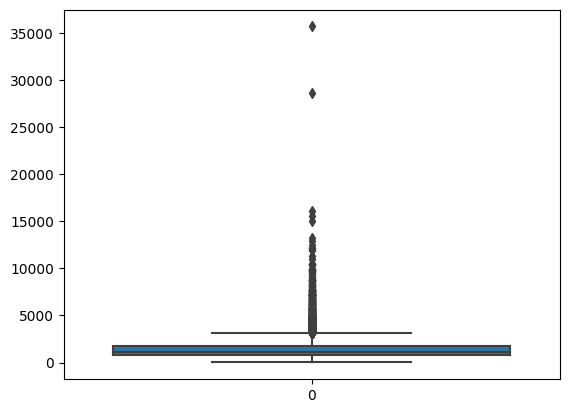

In [ ]:
sns.boxplot(df['population'])

In [ ]:
q3=df['population'].quantile(0.75)
q1=df['population'].quantile(0.25)
iqr=q3-q1
lower=q1-(1.5*iqr)
upper=q3+(1.5*iqr)

In [ ]:
df = df[(df['population']>=lower) & (df['population']<=upper)]

<Axes: >

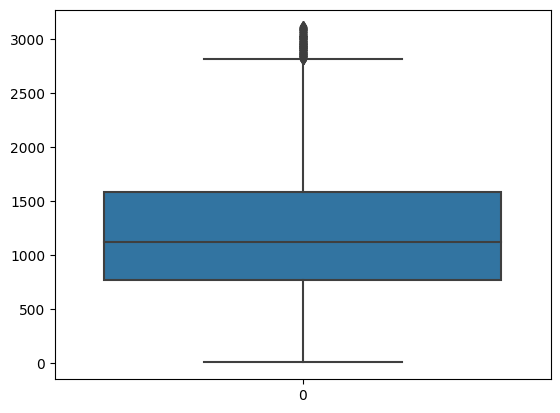

In [ ]:
sns.boxplot(df[(df['population']>=lower) & (df['population']<=upper)]['population'])

In [ ]:
df.shape

(15985, 9)

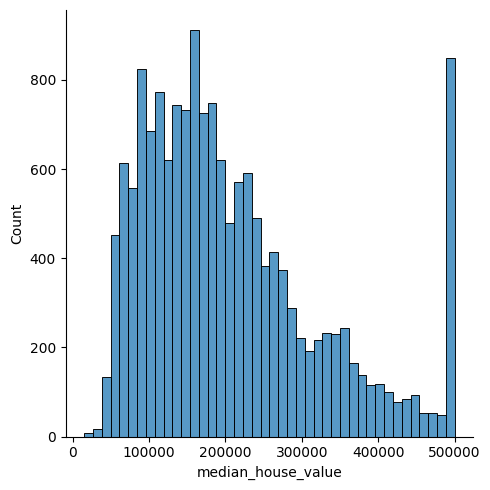

In [ ]:
sns.displot(df['median_house_value'])

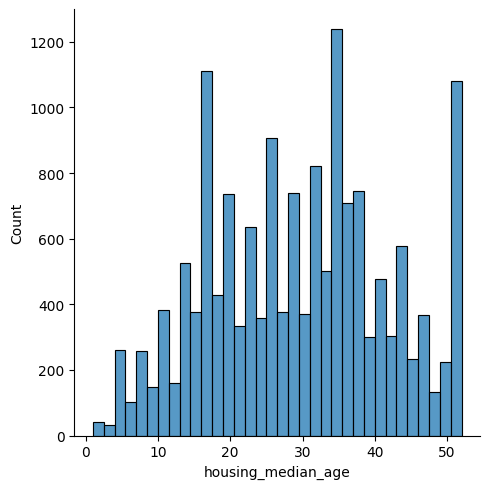

In [ ]:
sns.displot(df['housing_median_age'])

In [ ]:
import numpy as np


In [ ]:
sns.displot(df['median_house_value'])

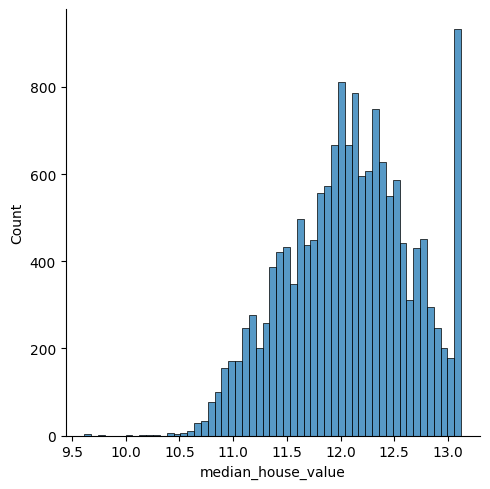

In [ ]:
sns.displot(np.log(df['median_house_value']))

In [ ]:
df['total_rooms'].mean() , df['total_rooms'].median()

(2299.253487644667, 2044.0)

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15985.000000,15985.000000,15985.000000,15985.000000,15985.000000,15985.000000,15985.000000,15985.000000,15985.000000
mean,-119.592481,35.655976,29.290084,2299.253488,470.555896,1224.384923,436.949327,3.876303,207625.441664
std,2.009072,2.148295,12.419984,1323.729529,269.908236,638.073173,239.792428,1.918718,117235.810553
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.810000,33.930000,19.000000,1424.000000,290.000000,768.000000,274.000000,2.558300,118200.000000
50%,-118.520000,34.270000,30.000000,2044.000000,417.000000,1121.000000,392.000000,3.533500,180100.000000
75%,-118.020000,37.730000,38.000000,2925.000000,599.000000,1587.000000,559.000000,4.743700,266400.000000
max,-114.310000,41.950000,52.000000,19107.000000,3923.000000,3117.000000,2051.000000,15.000100,500001.000000


<Axes: xlabel='housing_median_age', ylabel='total_rooms'>

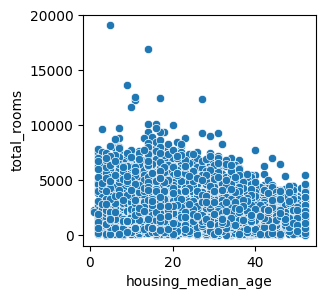

In [ ]:
plt.figure(figsize=(3,3))
sns.scatterplot(y=df['total_rooms'],x=df['housing_median_age'])

<Axes: xlabel='median_income', ylabel='population'>

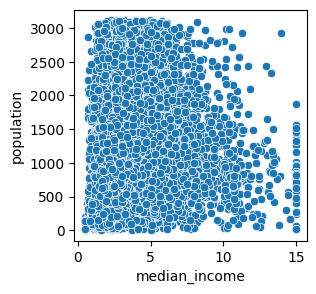

In [ ]:
plt.figure(figsize=(3,3))
sns.scatterplot(y=df['population'],x=df['median_income'])

In [ ]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924428,-0.106326,0.015885,0.049970,0.107725,0.034513,-0.012021,-0.040413
latitude,-0.924428,1.000000,0.006216,-0.012668,-0.052805,-0.130572,-0.065438,-0.085422,-0.150167
housing_median_age,-0.106326,0.006216,1.000000,-0.312880,-0.253784,-0.231223,-0.226496,-0.104685,0.110420
total_rooms,0.015885,-0.012668,-0.312880,1.000000,0.891105,0.765779,0.862206,0.233821,0.194418
total_bedrooms,0.049970,-0.052805,-0.253784,0.891105,1.000000,0.804856,0.955725,-0.056281,0.069390
population,0.107725,-0.130572,-0.231223,0.765779,0.804856,1.000000,0.863378,-0.038034,-0.039645
households,0.034513,-0.065438,-0.226496,0.862206,0.955725,0.863378,1.000000,-0.025625,0.094906
median_income,-0.012021,-0.085422,-0.104685,0.233821,-0.056281,-0.038034,-0.025625,1.000000,0.692340
median_house_value,-0.040413,-0.150167,0.110420,0.194418,0.069390,-0.039645,0.094906,0.692340,1.000000


<Axes: >

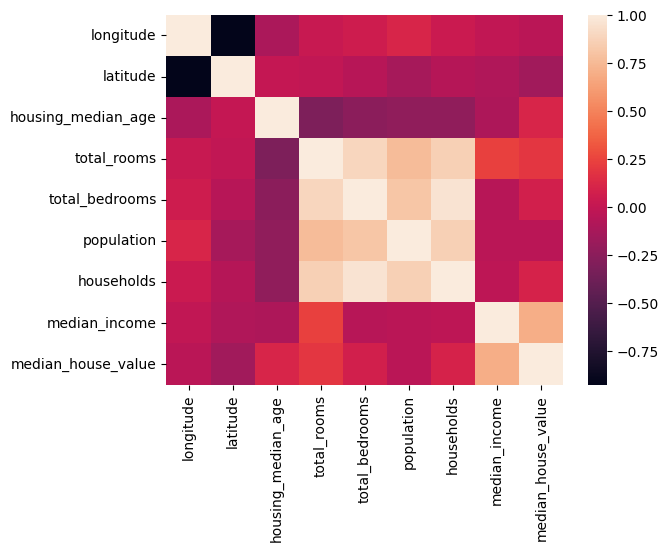

In [ ]:
sns.heatmap(df.corr())